In [ ]:
# Imports

# Notes

- definitely also leave this website somewhere in the notebook https://playground.tensorflow.org/
- todo remove the loss plots and show them later
- breakup the code parts
- maybe add torchinfo

# Table of Contents

<br><br>
# **Hands-On: Deep Learning Fundamentals**

## Why This Matters for Healthcare

Neural networks are revolutionizing medical practice:
- **Medical imaging**: Detecting cancer in radiology scans with superhuman accuracy
- **Drug discovery**: Accelerating the development of new treatments
- **Clinical decision support**: Predicting patient outcomes and treatment responses
- **Electronic health records**: Extracting insights from complex patient data

**This session will demystify the technology** behind these breakthroughs and show you how neural networks actually work.

## Learning Goals

By the end of this session, you will:

### **Understand How Neural Networks Think**
- Grasp the core concept: how simple mathematical functions combine to recognize complex patterns
- See why networks can learn any relationship in your data (Universal Approximation Theorem)

### TODO add more learning goals here

---

**No advanced math required** – we focus on intuition and practical understanding!

## What is a Neural Network?

A **neural network** is a computational model inspired by how biological neurons process information. At its core, it's a collection of interconnected nodes (neurons) that:

1. **Receive inputs** (like features from data)
2. **Apply weights** to these inputs (learned parameters)
3. **Add a bias term** (learned offset)
4. **Pass through an activation function** (introduces non-linearity)
5. **Produce an output** that feeds into the next layer

**Key components:**
- **Weights**: Determine the strength of connections between neurons
- **Biases**: Allow neurons to activate even when inputs are zero
- **Activation functions**: Non-linear functions (like ReLU, sigmoid, tanh) that enable networks to learn complex patterns

<img src="imgs/relu_nn.webp" alt="Neural Network Diagram" width="500"/>

## Why Neural Networks Are So Powerful

Here's the remarkable thing: **neural networks can learn to recognize ANY pattern** in your data, no matter how complex. This is backed by a fundamental mathematical principle:

> **The Universal Approximation Theorem**: Any continuous relationship can be learned by a neural network with enough neurons.

Let's see the magic in action by building complex functions from simple building blocks.

## Building Complex Patterns from Simple Parts

We'll demonstrate this using **ReLU (Rectified Linear Unit)** functions - the most common building block in modern neural networks.

**ReLU function**: `ReLU(x) = max(0, x)` - outputs the input if positive, zero otherwise.

The magic happens when we:
1. **Shift** ReLU functions to different positions
2. **Scale** them with different weights  
3. **Combine** multiple ReLUs together

Let's see how these simple "on/off" functions can create surprisingly complex patterns:

In [19]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Layout
import ipywidgets as widgets

def interactive_relu_demo():
    """Interactive demonstration of how ReLU combinations create different functions"""
    
    # Create x-axis
    x = torch.linspace(-2, 2, 1000)
    
    def plot_relu_combination(weight1=1.0, bias1=0.0, weight2=-0.5, bias2=0.5, weight3=0.3, bias3=-1.0):
        """Plot combination of 3 ReLU functions with adjustable parameters"""
        
        # Compute individual ReLU functions
        relu1 = weight1 * torch.relu(x + bias1)
        relu2 = weight2 * torch.relu(x + bias2)  
        relu3 = weight3 * torch.relu(x + bias3)
        
        # Combine all ReLUs
        combined = relu1 + relu2 + relu3
        
        # Create the plot
        plt.figure(figsize=(14, 8))
        
        # Plot individual ReLUs
        plt.subplot(1, 2, 1)
        plt.plot(x, relu1, 'r-', linewidth=2, label=f'ReLU1: {weight1:.1f}*ReLU(x + {bias1:.1f})')
        plt.plot(x, relu2, 'g-', linewidth=2, label=f'ReLU2: {weight2:.1f}*ReLU(x + {bias2:.1f})')
        plt.plot(x, relu3, 'b-', linewidth=2, label=f'ReLU3: {weight3:.1f}*ReLU(x + {bias3:.1f})')
        plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
        plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
        plt.title('Individual ReLU Functions')
        plt.xlabel('x')
        plt.ylabel('ReLU(x)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.ylim(-3, 3)
        
        # Plot combined function
        plt.subplot(1, 2, 2)
        plt.plot(x, combined, 'purple', linewidth=3, label='Combined Function')
        plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
        plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
        plt.title('Combined ReLU Function')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.ylim(-3, 3)
        
        plt.tight_layout()
        plt.show()
        
    # Create interactive sliders
    weight_layout = Layout(width='300px')
    bias_layout = Layout(width='300px')
    
    interact(plot_relu_combination,
             weight1=FloatSlider(min=-2, max=2, step=0.1, value=1.0, description='Weight 1:', layout=weight_layout),
             bias1=FloatSlider(min=-2, max=2, step=0.1, value=0.0, description='Bias 1:', layout=bias_layout),
             weight2=FloatSlider(min=-2, max=2, step=0.1, value=1.0, description='Weight 2:', layout=weight_layout),
             bias2=FloatSlider(min=-2, max=2, step=0.1, value=0.5, description='Bias 2:', layout=bias_layout),
             weight3=FloatSlider(min=-2, max=2, step=0.1, value=1.0, description='Weight 3:', layout=weight_layout),
             bias3=FloatSlider(min=-2, max=2, step=0.1, value=-0.5, description='Bias 3:', layout=bias_layout))

interactive_relu_demo()

interactive(children=(FloatSlider(value=1.0, description='Weight 1:', layout=Layout(width='300px'), max=2.0, m…

You can see how just changing the **weight** (slope) and **bias** (shift) parameters creates completely different function shapes. This is the key insight:

- **Weight** controls how steep the ReLU ramp is
- **Bias** controls where the ReLU "turns on" (shifts the corner left/right)
- **Combining multiple ReLUs** with different weights and biases lets us build complex, piecewise-linear functions

Now you understand the building blocks! But can we really approximate **any** function? Let's put this to the test with a challenging target: **the sine function**.

The sine function is smooth and curved - quite different from the sharp, linear segments of ReLU functions. Yet the Universal Approximation Theorem tells us we can get arbitrarily close using enough ReLUs.

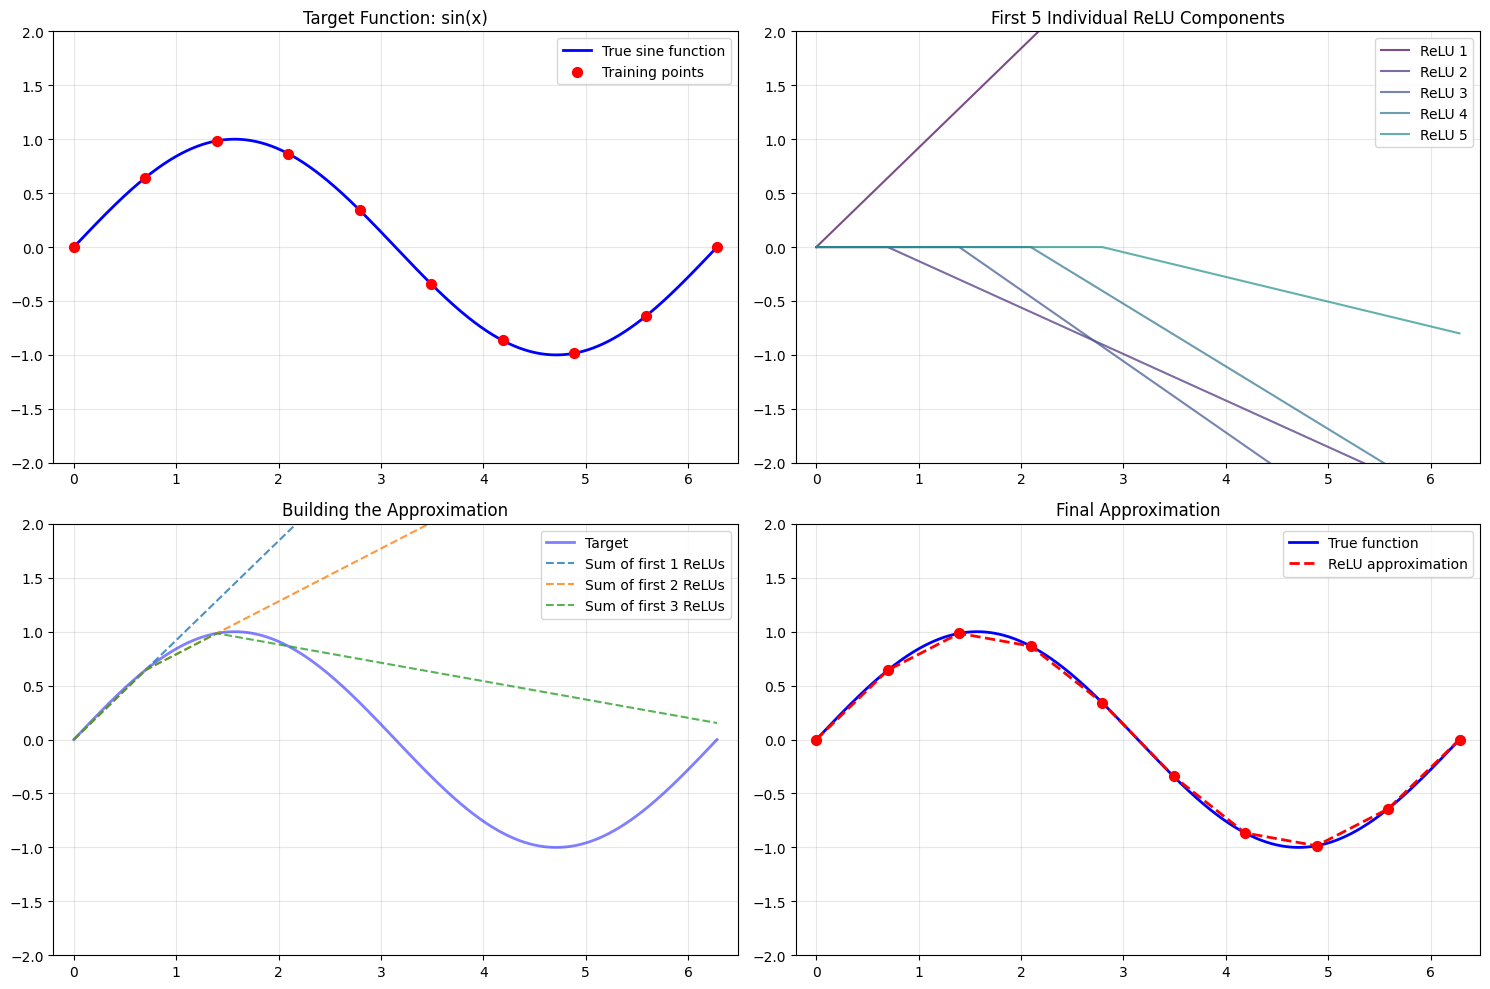

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def approximate_function(x_train, y_train):
    """
    Approximate any function using combination of ReLU activations
    
    Args:
        x_train: Training x points
        y_train: Training y points (target function values)
    
    Returns:
        y_hat: Approximated function values
        relu_acts: Individual ReLU activations
        x: Dense x-axis for plotting
    """
    
    # Number of ReLUs needed
    n_relus = x_train.shape[0] - 1
    
    # Dense x-axis for smooth plotting
    x = torch.linspace(torch.min(x_train), torch.max(x_train), 1000)
    
    ## COMPUTE RELU ACTIVATIONS
    # Set bias terms to "activate" ReLUs at training points
    b = -x_train[:-1]
    
    # Compute ReLU activations: ReLU(x + bias)
    relu_acts = torch.zeros((n_relus, x.shape[0]))
    for i_relu in range(n_relus):
        relu_acts[i_relu, :] = torch.relu(x + b[i_relu])
    
    ## COMBINE RELU ACTIVATIONS
    # Calculate weights to match target function slopes
    combination_weights = torch.zeros((n_relus,))
    
    prev_slope = 0
    for i in range(n_relus):
        delta_x = x_train[i+1] - x_train[i]
        slope = (y_train[i+1] - y_train[i]) / delta_x
        combination_weights[i] = slope - prev_slope
        prev_slope = slope
    
    # Final approximation: weighted sum of ReLUs
    y_hat = combination_weights @ relu_acts
    
    return y_hat, relu_acts, x, combination_weights

def plot_function_approximation(x, relu_acts, y_hat, combination_weights):
    """Plot the function approximation process"""
    
    # Original function for comparison
    y_true = torch.sin(x)

    # Set consistent axis limits for all plots
    x_lim = [float(torch.min(x))-0.2, float(torch.max(x))+0.2]
    y_lim = [-2, 2]  # Accommodate both sine function and individual ReLUs
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plot 1: Original function
    axes[0,0].plot(x, y_true, 'b-', linewidth=2, label='True sine function')
    axes[0,0].scatter(x_train.flatten(), y_train.flatten(), color='red', s=50, zorder=5, label='Training points')
    axes[0,0].set_title('Target Function: sin(x)')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Plot 2: Individual ReLU functions
    axes[0,1].set_title('First 5 Individual ReLU Components')
    colors = plt.cm.viridis(np.linspace(0, 1, relu_acts.shape[0]))
    for i in range(min(5, relu_acts.shape[0])):  # Show first 5 ReLUs
        axes[0,1].plot(x, combination_weights[i] * relu_acts[i], color=colors[i], alpha=0.7, label=f'ReLU {i+1}')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].set_xlim(x_lim)
    axes[0,1].set_ylim(y_lim)
    axes[0,0].set_xlim(x_lim)
    axes[0,0].set_ylim(y_lim)
    
    # Plot 3: Cumulative approximation
    axes[1,0].set_title('Building the Approximation')
    axes[1,0].plot(x, y_true, 'b-', linewidth=2, alpha=0.5, label='Target')
    
    # Show cumulative sum of ReLUs
    cumulative = torch.zeros_like(x)
    for i in range(min(3, relu_acts.shape[0])):
        cumulative += combination_weights[i] * relu_acts[i]
        axes[1,0].plot(x, cumulative, '--', alpha=0.8, label=f'Sum of first {i+1} ReLUs')
    
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].set_xlim(x_lim)
    axes[1,0].set_ylim(y_lim)
    
    # Plot 4: Final approximation
    axes[1,1].plot(x, y_true, 'b-', linewidth=2, label='True function')
    axes[1,1].plot(x, y_hat, 'r--', linewidth=2, label='ReLU approximation')
    axes[1,1].scatter(x_train.flatten(), y_train.flatten(), color='red', s=50, zorder=5)
    axes[1,1].set_title('Final Approximation')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].set_xlim(x_lim)
    axes[1,1].set_ylim(y_lim)
    
    plt.tight_layout()
    plt.show()

# Generate training data from sine function
N_train = 10
x_train = torch.linspace(0, 2*np.pi, N_train).view(-1, 1)
y_train = torch.sin(x_train)

# Approximate the function
y_hat, relu_acts, x, combination_weights = approximate_function(x_train, y_train)

# Visualize the approximation process
plot_function_approximation(x, relu_acts, y_hat, combination_weights)

Our ReLU approximation captures the sine wave's shape quite well, even with just 9 ReLU functions (from 10 training points). 

- The approximation follows the general sine curve structure  
- It perfectly matches at all training points (red dots)
- The piecewise-linear nature creates small "corners" but the overall shape is preserved

## Building Neural Networks with PyTorch

**What we just did**: Manually engineered a function approximator using mathematical formulas.

**What we'll do now**: Build the same thing (and more!) using PyTorch - the tool that powers most modern AI applications.

**Why this matters**: Understanding how to translate neural network concepts into working code is essential for applying AI to real problems.

## Your First Neural Network in PyTorch

Let's start with the simplest possible example - a single neuron that learns to approximate our sine function:

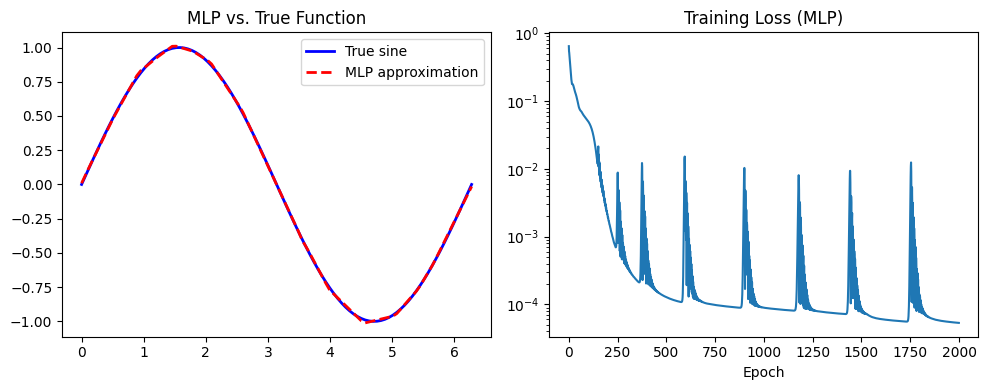

Final loss: 0.000053


In [26]:
from torch import nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()

        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size),   # Input to hidden
            nn.ReLU(),                           # Activation function
            nn.Linear(hidden_size, hidden_size), # Hidden to hidden  
            nn.ReLU(),                           # Activation function
            nn.Linear(hidden_size, output_size)  # Hidden to output
        )
    
    def forward(self, x):
        return self.layers(x)

# Create a more powerful network that has 20 hidden functions 
mlp = MLP(input_size=1, hidden_size=20, output_size=1)

# Train it the same way
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Generate training data from sine function
N_train = 100
x_train = torch.linspace(0, 2*np.pi, N_train).view(-1, 1)
y_train = torch.sin(x_train)

losses = []
for epoch in range(2000):
    y_pred = mlp(x_train)
    loss = criterion(y_pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

# Compare results
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(x_train, y_train, 'b', linewidth=2, label='True sine')
plt.plot(x_train, mlp(x_train).detach(), 'r--', linewidth=2, label='MLP approximation')
plt.title('MLP vs. True Function')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(losses)
plt.title('Training Loss (MLP)')
plt.xlabel('Epoch')
plt.yscale('log')

plt.tight_layout()
plt.show()

print(f"Final loss: {losses[-1]:.6f}")

## From Function Approximation to Classification

**Great! We just built neural networks that learn continuous functions.** However we can use MLP also for classification tasks
**Healthcare examples:**
- Tumor: malignant or benign?
- Patient: high risk or low risk?
- X-ray: pneumonia or healthy?

Let's see how MLPs handle classification with a visual example we can fully understand.

## Classification Challenge: Nested Circles

**The Problem**: Can a neural network learn to distinguish between points in an inner circle vs. an outer ring?

- **Inner circle**: Class 0 (red points)
- **Outer ring**: Class 1 (blue points) 
- **Challenge**: This requires a **circular decision boundary** - something a single line can't capture!

**Why this matters**: This demonstrates how neural networks transform simple 2D coordinates into complex decision boundaries. The same principle applies to medical data - just harder to visualize.

## Visualizing How Neural Networks Think

Following your boss's suggestion, we'll use **dimensionality reduction** to see how data transforms through each layer:

**Input → Hidden Layer → Output**

Watch how the network gradually separates the two classes by transforming the data through each layer!


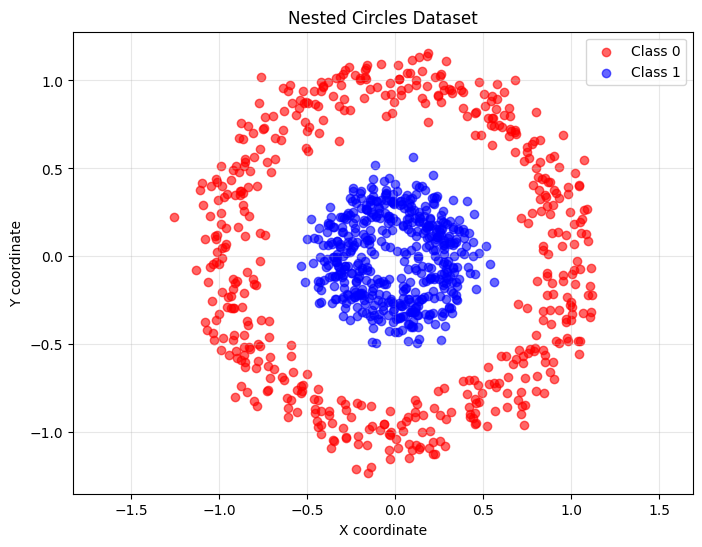

Epoch 0, Accuracy: 0.5000
Epoch 200, Accuracy: 1.0000
Epoch 400, Accuracy: 1.0000
Epoch 600, Accuracy: 1.0000
Epoch 800, Accuracy: 1.0000


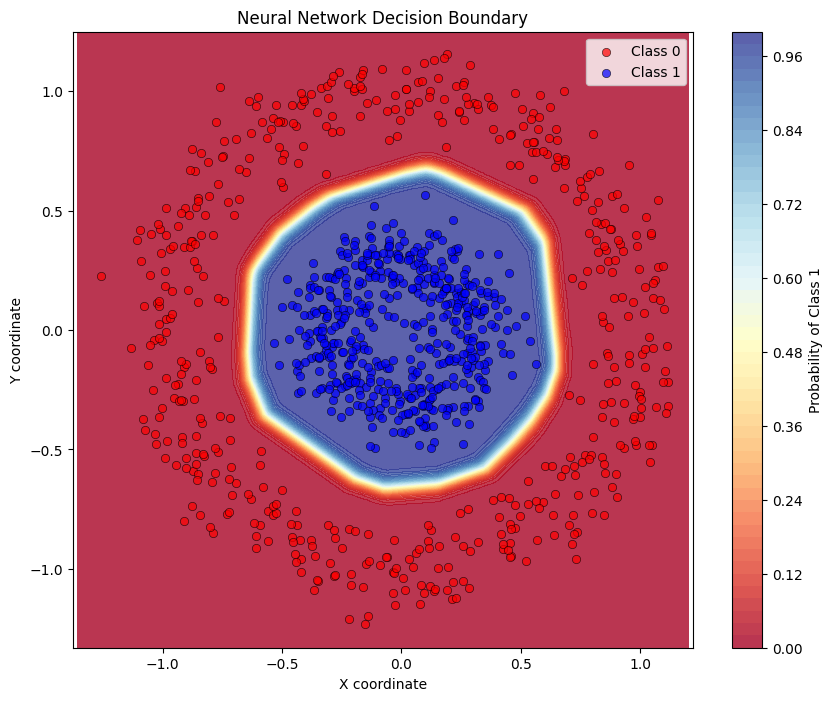

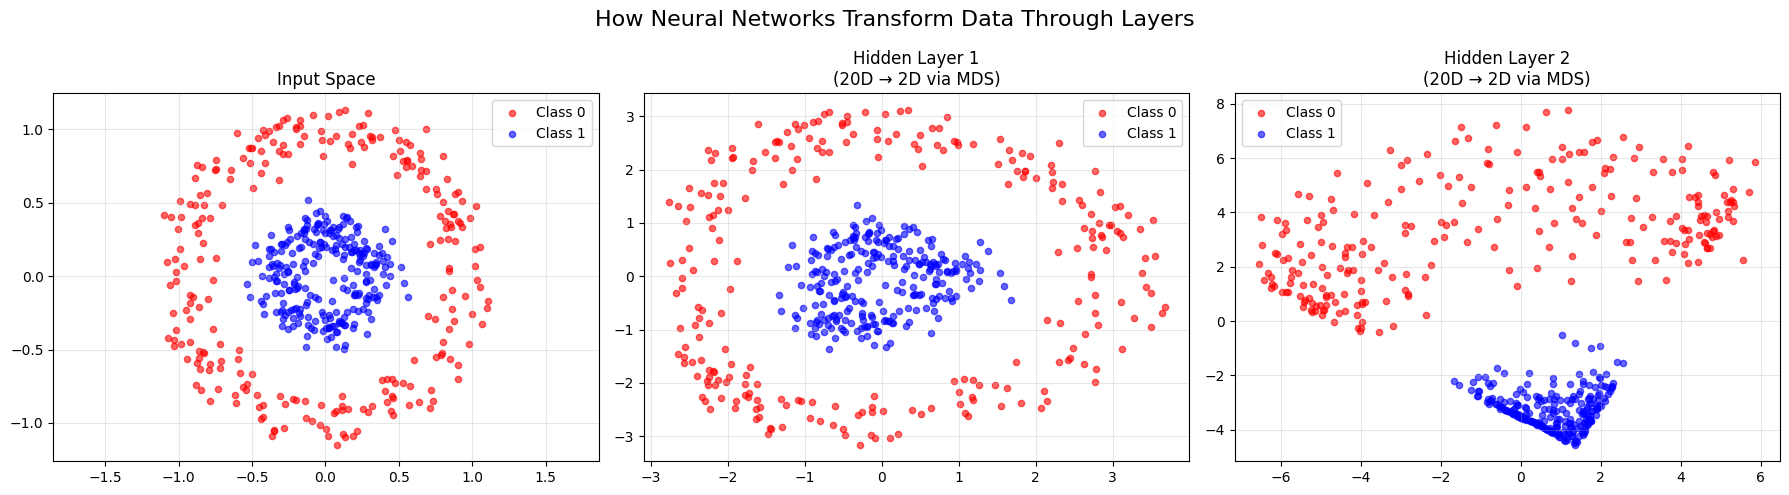

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import MDS
import seaborn as sns
from sklearn.datasets import make_circles

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

def create_nested_circles_data(n_samples=1000, noise=0.1, random_state=42):
    """Create nested circles dataset using sklearn"""
    X, y = make_circles(n_samples=n_samples, 
                        noise=noise, 
                        factor=0.3,  # ratio of inner to outer circle
                        random_state=random_state)
    
    return torch.FloatTensor(X), torch.LongTensor(y)

# Create dataset
X_train, y_train = create_nested_circles_data(1000)

# Visualize the data
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
for i in range(2):
    mask = y_train == i
    plt.scatter(X_train[mask, 0], X_train[mask, 1], 
                c=colors[i], alpha=0.6, 
                label=f'Class {i}')
plt.title('Nested Circles Dataset')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.show()

class CircleClassifier(nn.Module):
    def __init__(self, input_size=2, hidden_size=10, num_classes=2):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # Store intermediate representations
        self.input_repr = x
        
        # First hidden layer
        h1 = self.relu(self.layer1(x))
        self.hidden1_repr = h1
        
        # Second hidden layer  
        h2 = self.relu(self.layer2(h1))
        self.hidden2_repr = h2
        
        # Output layer
        output = self.layer3(h2)
        
        return output
    
    def get_representations(self, x):
        """Get intermediate representations for visualization"""
        with torch.no_grad():
            self.forward(x)
            return {
                'input': self.input_repr.numpy(),
                'hidden1': self.hidden1_repr.numpy(), 
                'hidden2': self.hidden2_repr.numpy()
            }

# Create and train the model
model = CircleClassifier(hidden_size=20)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(1000):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 200 == 0:
        with torch.no_grad():
            predictions = torch.argmax(outputs, dim=1)
            accuracy = (predictions == y_train).float().mean()
            print(f'Epoch {epoch}, Accuracy: {accuracy.item():.4f}')

def visualize_decision_boundary(model, X, y):
    """Visualize the decision boundary learned by the model"""
    # Create a mesh
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh
    mesh_points = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    with torch.no_grad():
        outputs = model(mesh_points)
        predictions = torch.softmax(outputs, dim=1)[:, 1]  # Probability of class 1
    
    predictions = predictions.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, predictions, levels=50, alpha=0.8, cmap='RdYlBu')
    plt.colorbar(label='Probability of Class 1')
    
    # Plot data points
    colors = ['red', 'blue']
    for i in range(2):
        mask = y == i
        plt.scatter(X[mask, 0], X[mask, 1], 
                    c=colors[i], alpha=0.7, 
                    label=f'Class {i}', edgecolors='black', linewidth=0.5)
    
    plt.title('Neural Network Decision Boundary')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.legend()
    plt.axis('equal')
    plt.show()

def visualize_layer_transformations(model, X, y, n_samples=500):
    """Visualize how data transforms through network layers using MDS"""
    
    # Sample subset for clarity
    indices = np.random.choice(len(X), n_samples, replace=False)
    X_sample = X[indices]
    y_sample = y[indices]
    
    # Get representations from each layer
    representations = model.get_representations(X_sample)
    
    # Set up the plot
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    layer_names = ['Input Space', 'Hidden Layer 1', 'Hidden Layer 2']
    
    colors = ['red', 'blue']
    
    for i, (layer_name, layer_key) in enumerate(zip(layer_names, ['input', 'hidden1', 'hidden2'])):
        data = representations[layer_key]
        
        # If more than 2 dimensions, use MDS to reduce to 2D
        if data.shape[1] > 2:
            mds = MDS(n_components=2, random_state=42)
            data_2d = mds.fit_transform(data)
        else:
            data_2d = data
            
        # Plot each class
        for class_idx in range(2):
            mask = y_sample == class_idx
            axes[i].scatter(data_2d[mask, 0], data_2d[mask, 1], 
                           c=colors[class_idx], alpha=0.6, 
                           label=f'Class {class_idx}', s=20)
        
        axes[i].set_title(f'{layer_name}\n({data.shape[1]}D → 2D via MDS)' if data.shape[1] > 2 
                         else f'{layer_name}')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        
        # Make axes equal for input space
        if i == 0:
            axes[i].axis('equal')
    
    plt.suptitle('How Neural Networks Transform Data Through Layers', fontsize=16)
    plt.tight_layout()
    plt.show()

# Visualize results
visualize_decision_boundary(model, X_train.numpy(), y_train.numpy())
visualize_layer_transformations(model, X_train, y_train)

In [39]:
!pip install torchinfo

In [ ]:
# probably overkill but interesting
from torchinfo import summary

# Detailed model summary
summary(model, input_size=(100, 2))  # batch_size=100, input_features=2

Layer (type:depth-idx)                   Output Shape              Param #
CircleClassifier                         [100, 2]                  --
├─Linear: 1-1                            [100, 20]                 60
├─ReLU: 1-2                              [100, 20]                 --
├─Linear: 1-3                            [100, 20]                 420
├─ReLU: 1-4                              [100, 20]                 --
├─Linear: 1-5                            [100, 2]                  42
Total params: 522
Trainable params: 522
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.05
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 0.00
Estimated Total Size (MB): 0.04

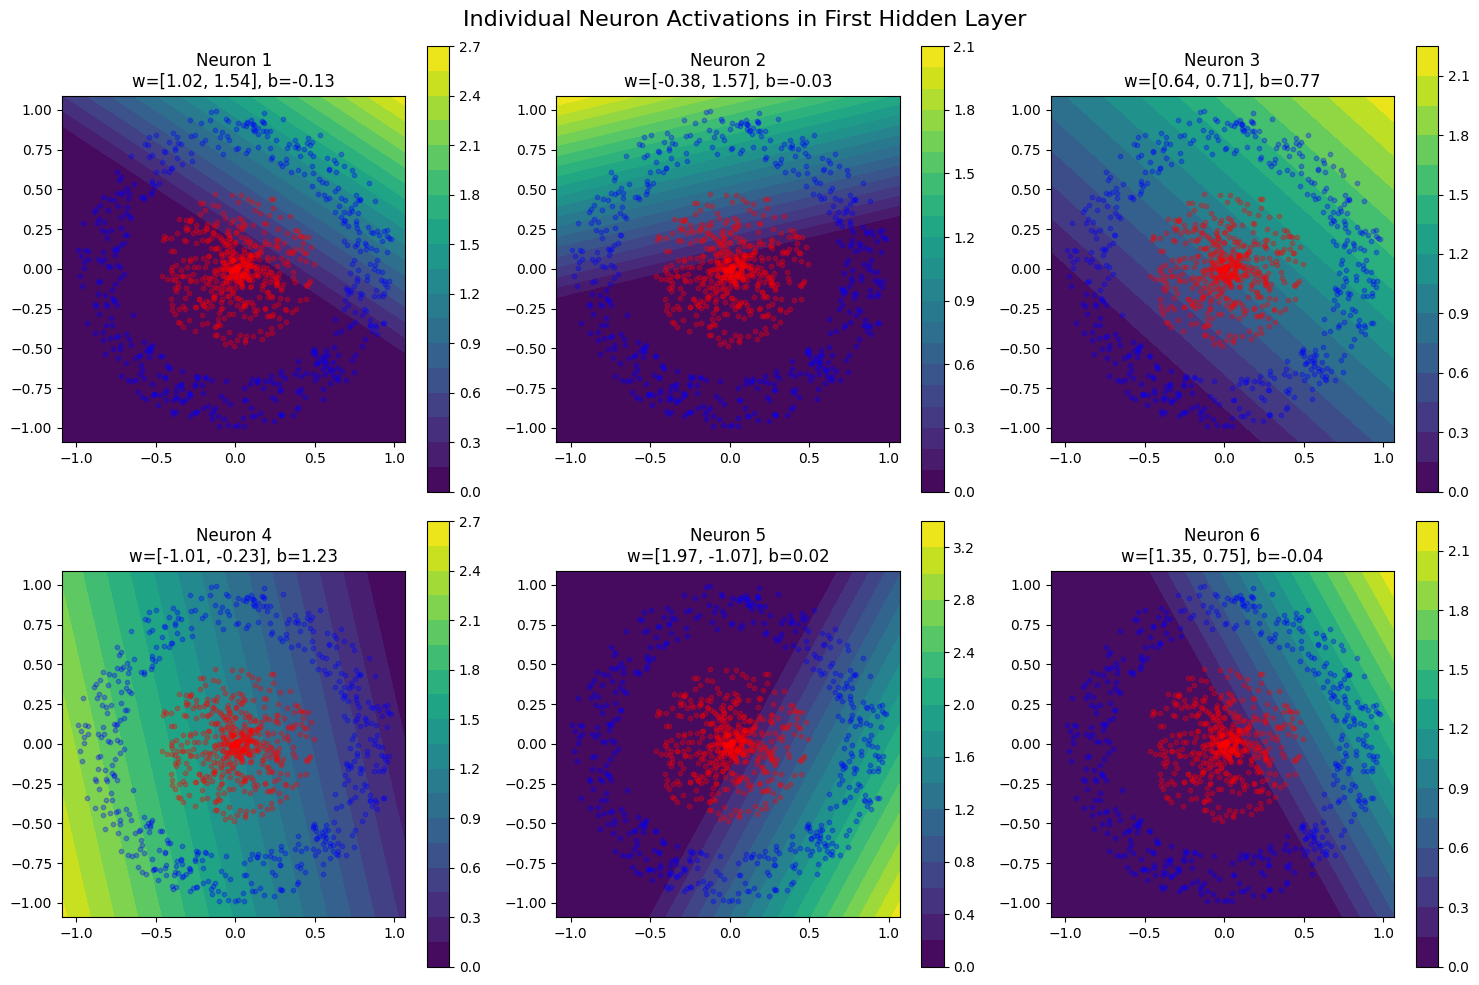

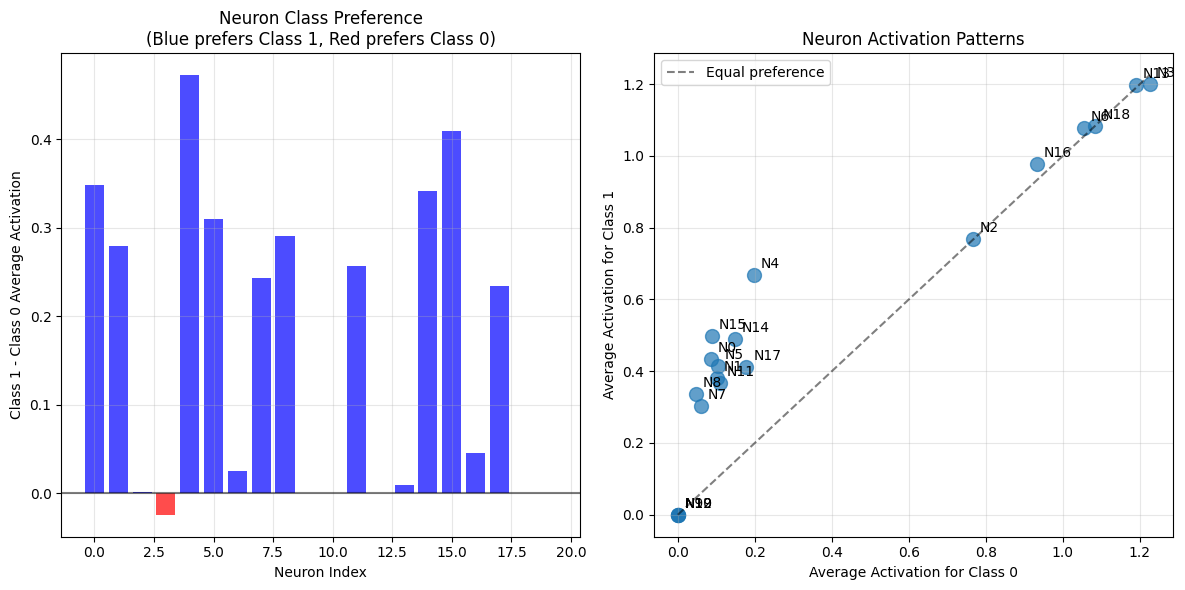

Neuron Specialization Analysis:
----------------------------------------
Neuron  0: Strongly prefers Class 1 (difference: 0.348)
Neuron  1: Strongly prefers Class 1 (difference: 0.279)
Neuron  4: Strongly prefers Class 1 (difference: 0.472)
Neuron  5: Strongly prefers Class 1 (difference: 0.310)
Neuron  7: Strongly prefers Class 1 (difference: 0.242)
Neuron  8: Strongly prefers Class 1 (difference: 0.291)
Neuron 11: Strongly prefers Class 1 (difference: 0.257)
Neuron 14: Strongly prefers Class 1 (difference: 0.342)
Neuron 15: Strongly prefers Class 1 (difference: 0.409)
Neuron 17: Strongly prefers Class 1 (difference: 0.234)


In [29]:
def visualize_individual_neurons(model, X, y):
    """Visualize what individual neurons in the first hidden layer learned"""
    
    # Get the trained weights and biases of first layer
    weights = model.layer1.weight.data.numpy()  # Shape: (hidden_size, 2)
    biases = model.layer1.bias.data.numpy()     # Shape: (hidden_size,)
    
    # Create a mesh for visualization
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Show first 6 neurons
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for neuron_idx in range(min(6, len(weights))):
        # Calculate neuron activation: ReLU(w*x + b)
        w = weights[neuron_idx]
        b = biases[neuron_idx]
        
        # Linear combination: w1*x + w2*y + b
        linear_output = mesh_points @ w + b
        # Apply ReLU
        neuron_activation = np.maximum(0, linear_output)
        neuron_activation = neuron_activation.reshape(xx.shape)
        
        # Plot activation map
        im = axes[neuron_idx].contourf(xx, yy, neuron_activation, levels=20, cmap='viridis')
        axes[neuron_idx].set_title(f'Neuron {neuron_idx+1}\nw=[{w[0]:.2f}, {w[1]:.2f}], b={b:.2f}')
        
        # Overlay some data points
        colors = ['red', 'blue']
        for class_idx in range(2):
            mask = y == class_idx
            axes[neuron_idx].scatter(X[mask, 0], X[mask, 1], 
                                   c=colors[class_idx], alpha=0.3, s=10)
        
        plt.colorbar(im, ax=axes[neuron_idx])
        axes[neuron_idx].set_aspect('equal')
    
    plt.suptitle('Individual Neuron Activations in First Hidden Layer', fontsize=16)
    plt.tight_layout()
    plt.show()

def visualize_neuron_specialization(model, X, y):
    """Show which neurons activate most for each class"""
    
    # Get activations for all data points
    representations = model.get_representations(X)
    hidden1_activations = representations['hidden1']
    
    # Calculate average activation per neuron for each class
    class0_mask = y == 0
    class1_mask = y == 1
    
    avg_activation_class0 = hidden1_activations[class0_mask].mean(axis=0)
    avg_activation_class1 = hidden1_activations[class1_mask].mean(axis=0)
    
    # Find neurons that prefer each class
    preference = avg_activation_class1 - avg_activation_class0
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    neuron_indices = range(len(preference))
    colors = ['red' if p < 0 else 'blue' for p in preference]
    plt.bar(neuron_indices, preference, color=colors, alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    plt.title('Neuron Class Preference\n(Blue prefers Class 1, Red prefers Class 0)')
    plt.xlabel('Neuron Index')
    plt.ylabel('Class 1 - Class 0 Average Activation')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.scatter(avg_activation_class0, avg_activation_class1, s=100, alpha=0.7)
    for i, (x, y_val) in enumerate(zip(avg_activation_class0, avg_activation_class1)):
        plt.annotate(f'N{i}', (x, y_val), xytext=(5, 5), textcoords='offset points')
    
    # Add diagonal line
    max_val = max(avg_activation_class0.max(), avg_activation_class1.max())
    plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='Equal preference')
    
    plt.xlabel('Average Activation for Class 0')
    plt.ylabel('Average Activation for Class 1') 
    plt.title('Neuron Activation Patterns')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print insights
    print("Neuron Specialization Analysis:")
    print("-" * 40)
    for i, pref in enumerate(preference):
        if abs(pref) > 0.1:  # Only show neurons with clear preference
            preferred_class = 1 if pref > 0 else 0
            print(f"Neuron {i:2d}: Strongly prefers Class {preferred_class} (difference: {pref:.3f})")

# Visualize what individual neurons learned
visualize_individual_neurons(model, X_train.numpy(), y_train.numpy())
visualize_neuron_specialization(model, X_train, y_train)

# Gradient Descent / backpropagation

But how does the model actually learn? -> introduce gradient descent and backpropagation mit evtl visualisierungen von notebooks

# maybe a subchapter about hyperparameter tuning?

# Convolutional neural networks / how to process images

comeback to mnist

# Pretrained networks

Often we can build upon already trained networks and improve them for our usecases. -> explain how, where to find them certain applications etc.